In [2]:
from scipy.io.arff import loadarff
import pandas as pd 

# Martijn's path: /content/drive/Shareddrives/Martijn/xAI course/dataset_31_credit-g.arff
raw_data = loadarff("dataset_31_credit-g.arff")
df = pd.DataFrame(raw_data[0])

for col, dtype in df.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        df[col] = df[col].apply(lambda x: x.decode("utf-8"))

X = df.drop('class', axis=1)
y = df['class']

def convert_to_dummies(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, dummy_columns], axis=1)
            df = df.drop(column, axis=1)
    return df

X_prime = convert_to_dummies(X)
X_prime

duration  credit_amount  installment_commitment  residence_since   age  \
0         6.0         1169.0                     4.0              4.0  67.0   
1        48.0         5951.0                     2.0              2.0  22.0   
2        12.0         2096.0                     2.0              3.0  49.0   
3        42.0         7882.0                     2.0              4.0  45.0   
4        24.0         4870.0                     3.0              4.0  53.0   
..        ...            ...                     ...              ...   ...   
995      12.0         1736.0                     3.0              4.0  31.0   
996      30.0         3857.0                     4.0              4.0  40.0   
997      12.0          804.0                     4.0              4.0  38.0   
998      45.0         1845.0                     4.0              4.0  23.0   
999      45.0         4576.0                     3.0              4.0  27.0   

     existing_credits  num_dependents  checking_status_<0  \
0                 2.0             1.0                True   
1                 1.0             1.0               False   
2                 1.0             2.0               False   
3                 1.0             2.0                True   
4                 2.0             2.0                True   
..                ...             ...                 ...   
995               1.0             1.0               False   
996               1.0             1.0                True   
997               1.0             1.0               False   
998               1.0             1.0                True   
999               1.0             1.0               False   

     checking_status_>=200  checking_status_no checking  ...  \
0                    False                        False  ...   
1                    False                        False  ...   
2                    False                         True  ...   
3                    False                        False  ...   
4                    False                        False  ...   
..                     ...                          ...  ...   
995                  False                         True  ...   
996                  False                        False  ...   
997                  False                         True  ...   
998                  False                        False  ...   
999                  False                        False  ...   

     property_magnitude_real estate  other_payment_plans_none  \
0                              True                      True   
1                              True                      True   
2                              True                      True   
3                             False                      True   
4                             False                      True   
..                              ...                       ...   
995                            True                      True   
996                           False                      True   
997                           False                      True   
998                           False                      True   
999                           False                      True   

     other_payment_plans_stores  housing_own  housing_rent  job_skilled  \
0                         False         True         False         True   
1                         False         True         False         True   
2                         False         True         False        False   
3                         False        False         False         True   
4                         False        False         False         True   
..                          ...          ...           ...          ...   
995                       False         True         False        False   
996                       False         True         False        False   
997                       False         True         False         True   
998                    

### SHAP Contribution Plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


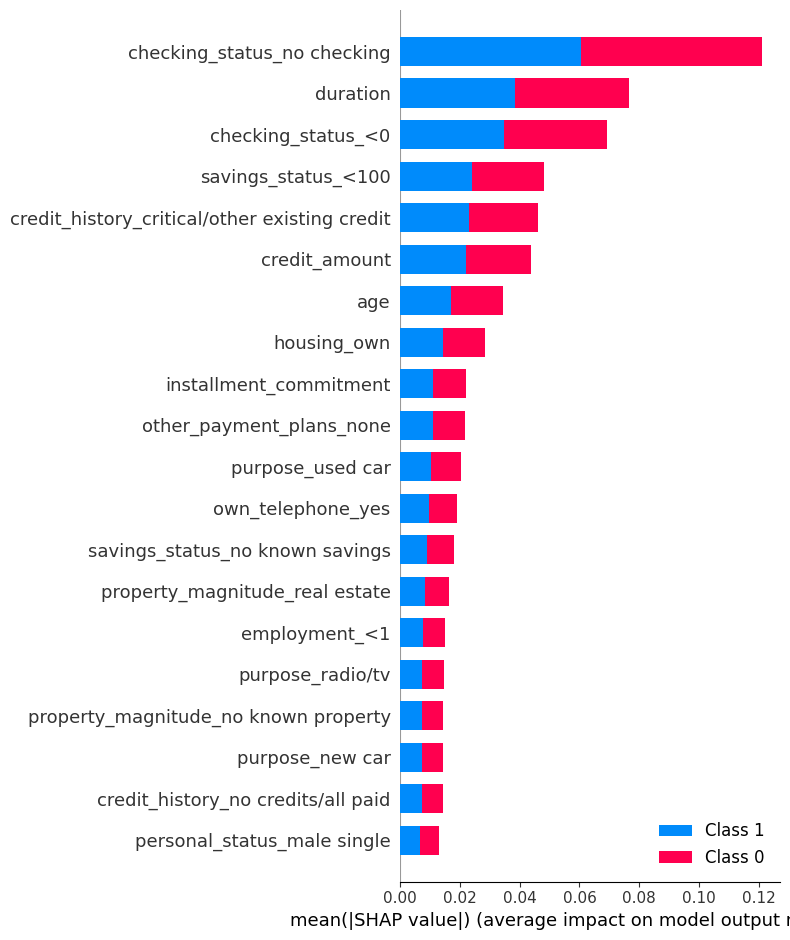

In [3]:
import joblib
import shap
import matplotlib.pyplot as plt

clf = joblib.load('random_forest_model.pkl')
explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_prime)

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_prime, plot_type="bar")
plt.show()

### SHAP explanations for Good credit score 

* A positive checking account, a and a longer duration of existing credit all contribute to a higher predicted credit score. 
* We also see that the higher value of age tends to negatively affect a good credit score 
* The existence of other ongoing credits also lower the chances of getting a good credit score, similarly if all prior credits are paid, then the likelihood of a good credit score increases. 
* A higher credit amount also positively contribute to a good credit score. 

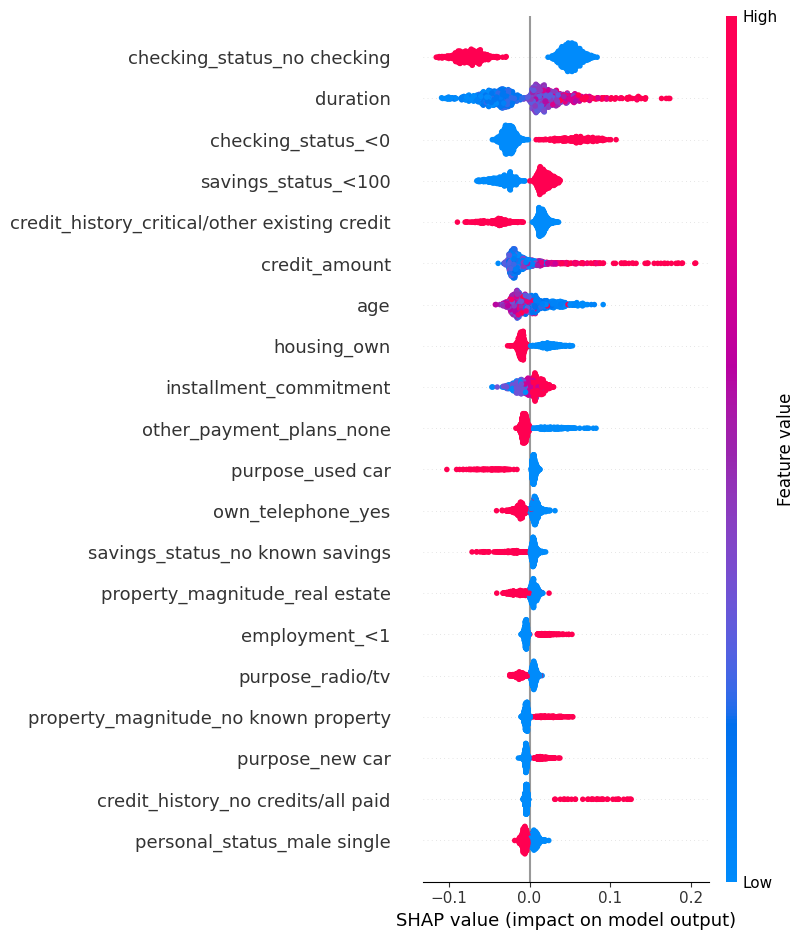

In [14]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[0], X_prime, plot_type="dot")
plt.show()

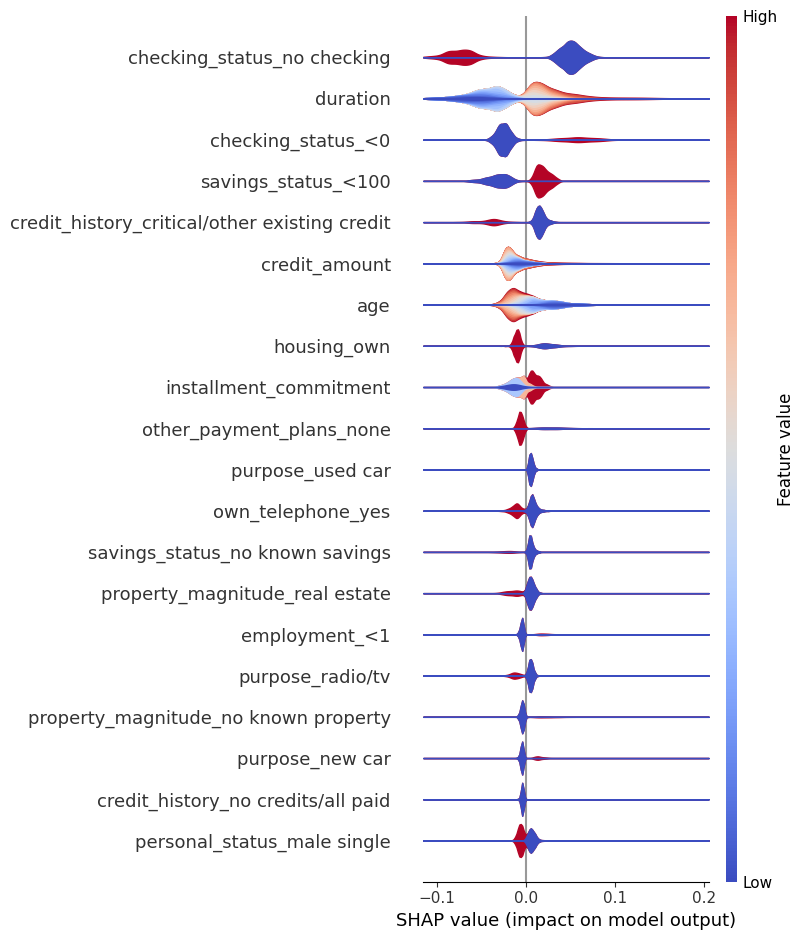

In [5]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[0], X_prime, plot_type="layered_violin")
plt.show()

In [15]:
correctly_classified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred == y[index])& (pred == 'bad'))]
correctly_classified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred == y[index])& (pred == 'good'))]

print((correctly_classified_indices_1))
# Choose 1-2 misclassified instances
misclassified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred != y[index]) & (pred == 'bad'))]
misclassified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred != y[index]) & (pred == 'good'))]

#print(misclassified_indices_0)


[0, 2, 3, 5, 6, 7, 8, 12, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 60, 61, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 88, 90, 91, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 110, 111, 112, 114, 115, 117, 119, 121, 122, 123, 125, 126, 128, 132, 133, 134, 135, 136, 138, 139, 140, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 171, 173, 176, 177, 178, 179, 183, 185, 187, 189, 193, 196, 198, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 231, 232, 233, 234, 238, 239, 241, 243, 244, 245, 246, 247, 248, 250, 251, 253, 254, 255, 256, 258, 259, 260, 261, 262, 263, 264, 266, 267, 269, 270, 271, 272, 275, 276, 277, 279, 280, 281, 282, 283, 284, 286, 287, 288, 290, 292, 293, 294, 296, 297, 298, 299, 3

## Shap Force Plots For Misclassified instances as "good" 

In [7]:
print(type(explainer.expected_value))
print(explainer.expected_value.shape)
explainer.expected_value[0]

def show_force_plot(index): 
    explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
    shap_values = explainer.shap_values(X_prime)
# Visualize SHAP values for the selected instances

    force_plot = shap.force_plot(
        explainer.expected_value[0], 
        shap_values[0][index,:],
        feature_names= X_prime.columns.tolist()
    )
    shap.initjs()
    display(force_plot)


show_force_plot(143)
show_force_plot(15)

<class 'numpy.ndarray'>
(2,)


## Shap Force Plots For correctly classfied instances as "good" 

In [8]:
show_force_plot(24)
show_force_plot(150)

## Shap Force Plots For Misclassified instances as "bad" 

In [9]:
show_force_plot(229)
show_force_plot(993)

## Shap Force Plots For Correctly Classified instances as "bad" 

In [16]:
show_force_plot(50)
show_force_plot(212)

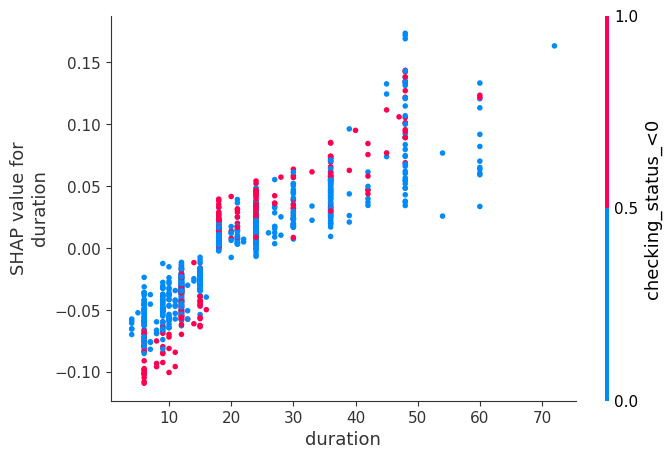

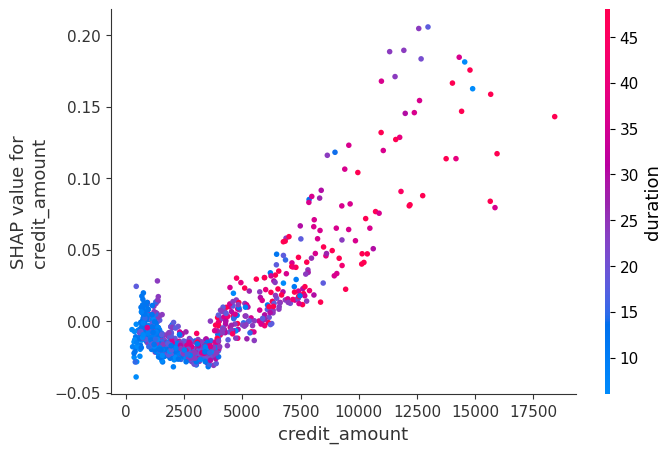

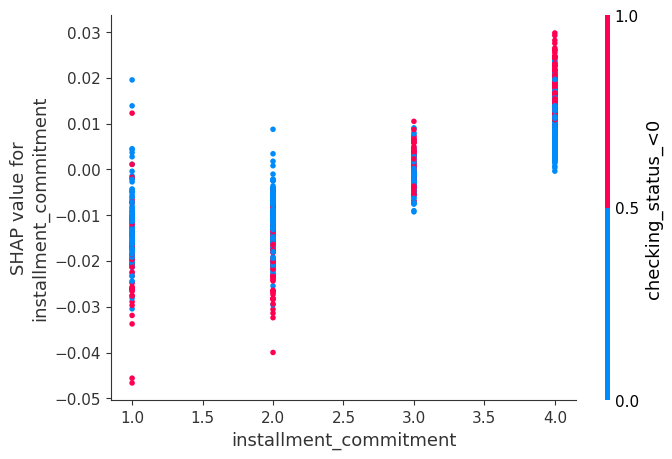

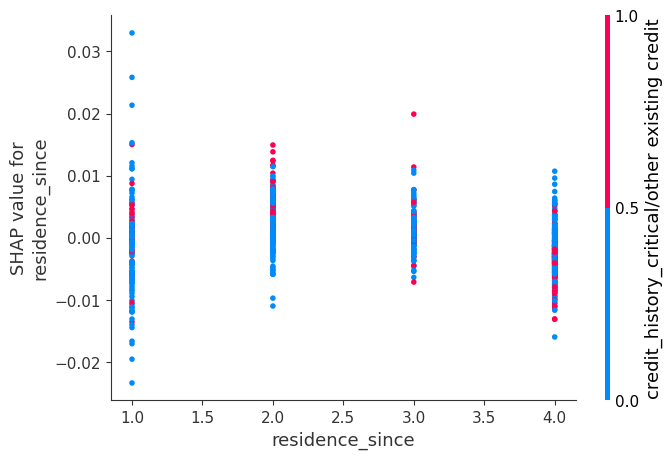

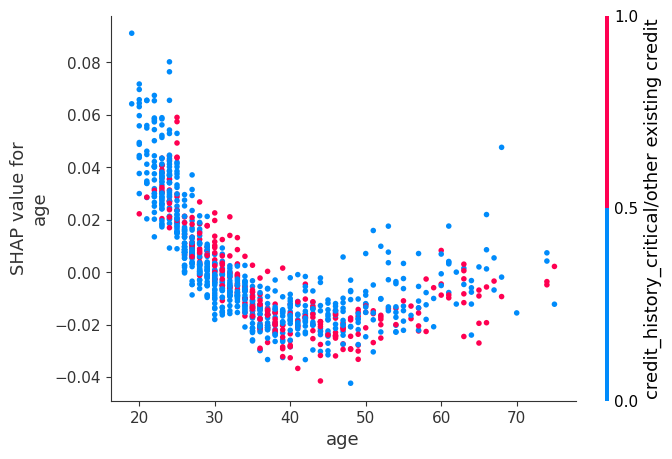

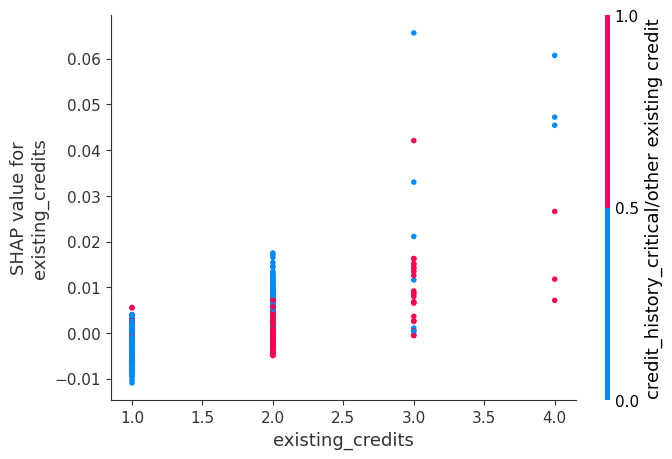

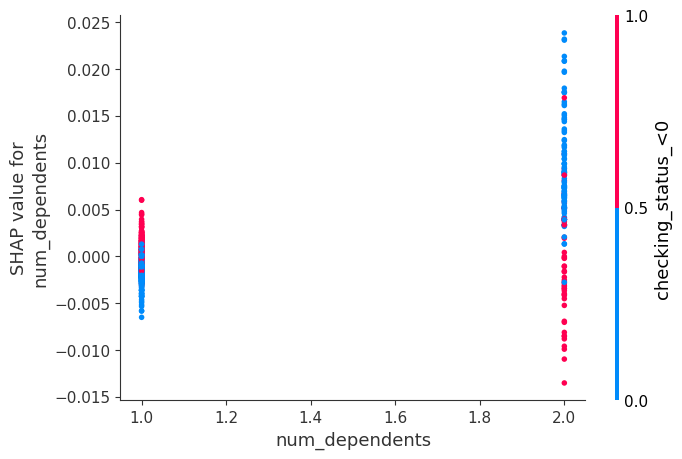

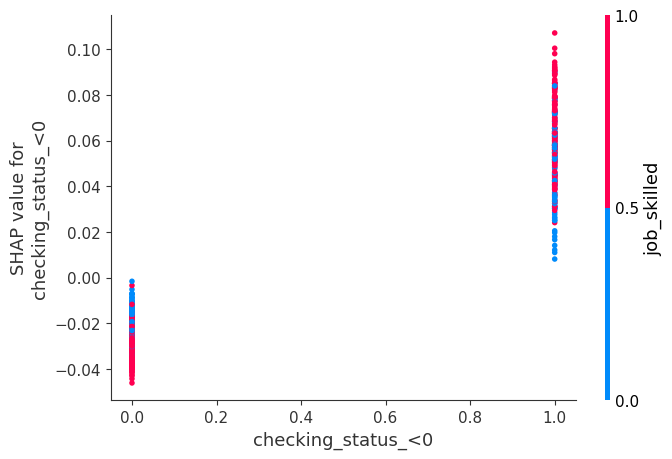

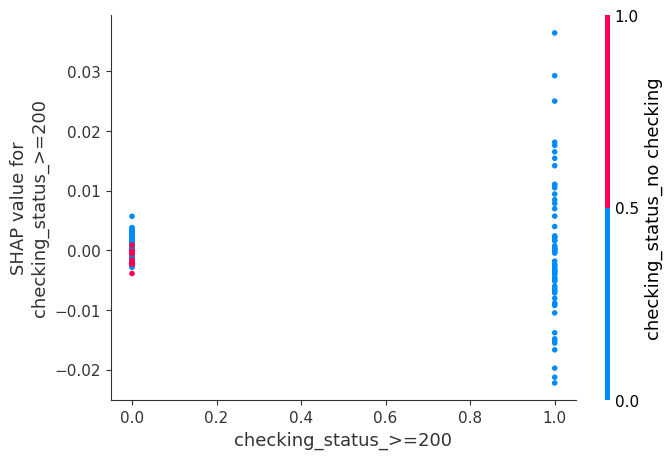

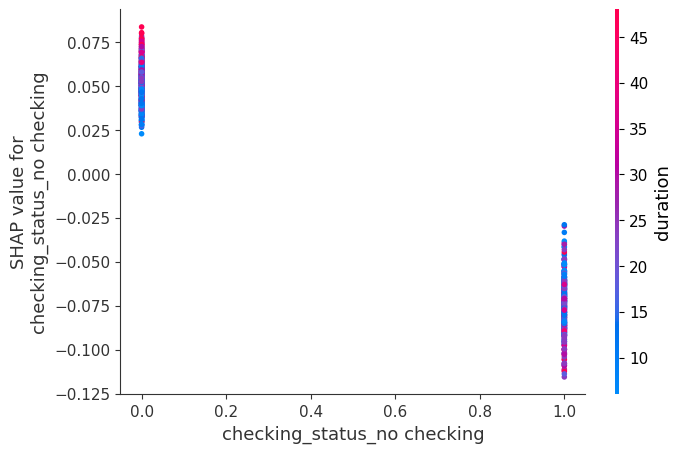

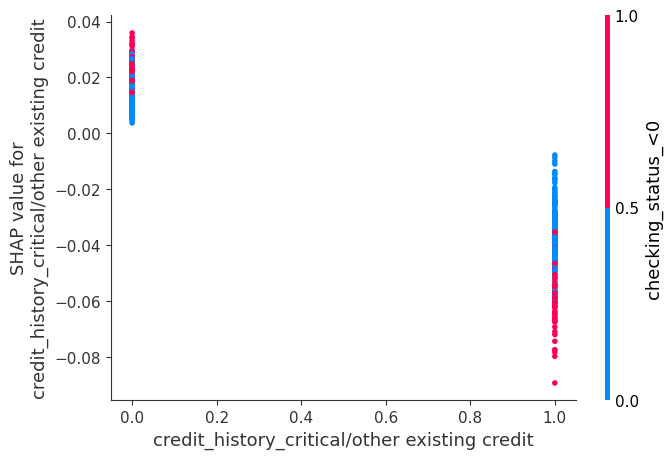

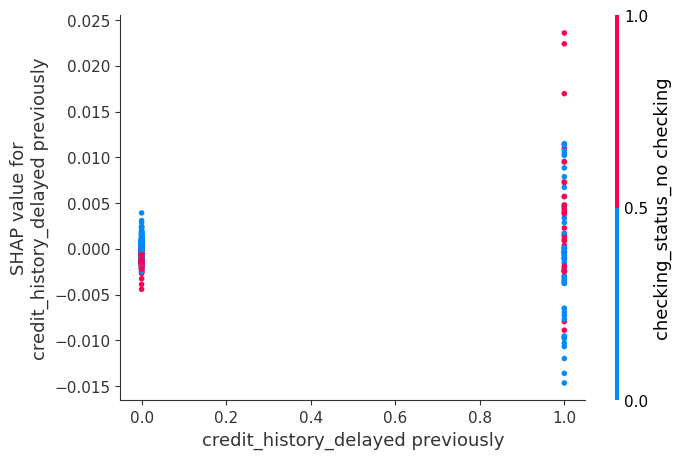

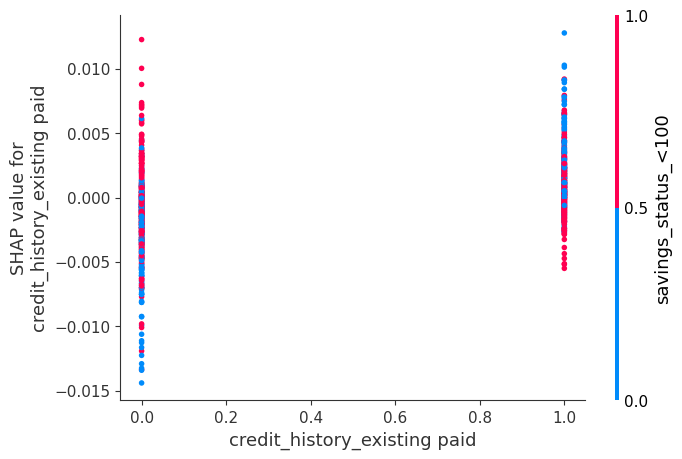

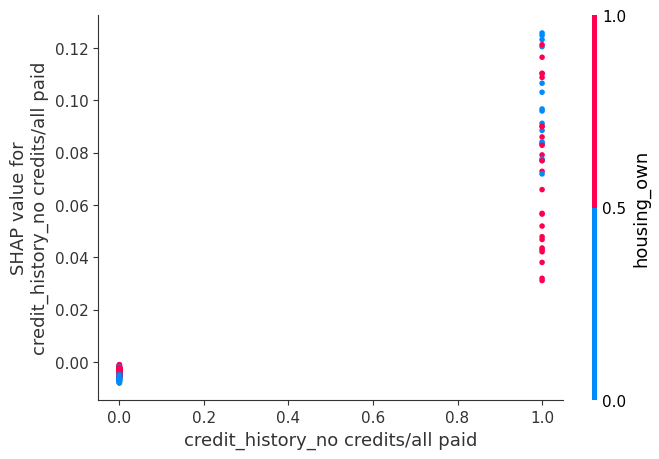

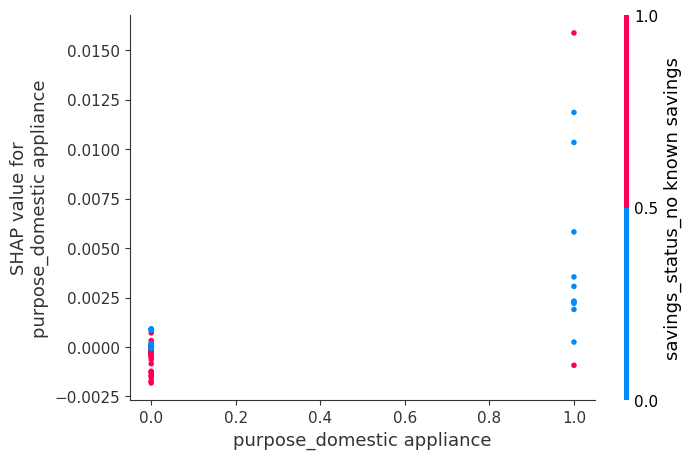

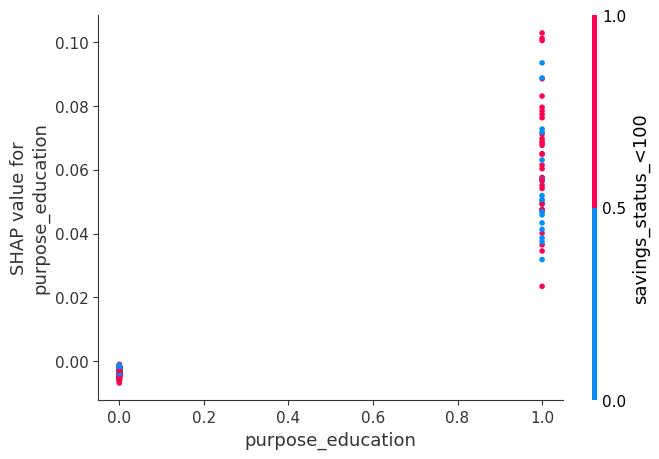

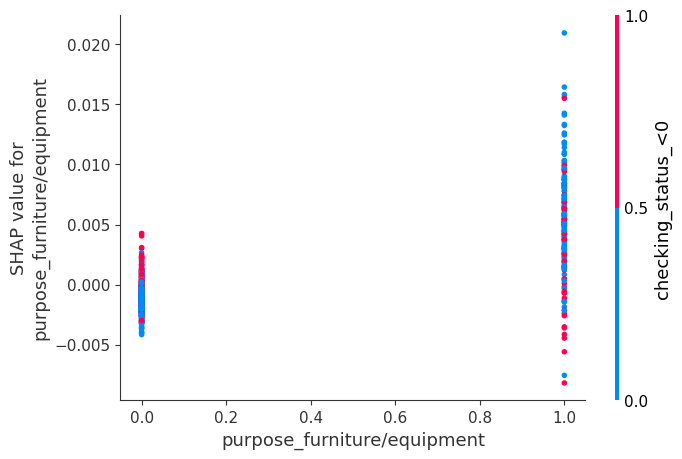

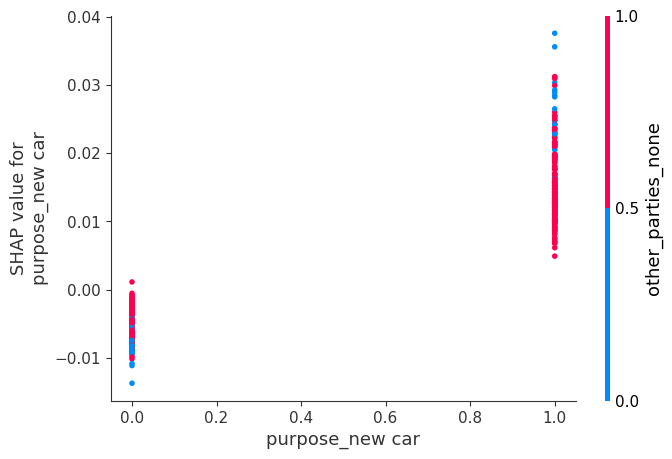

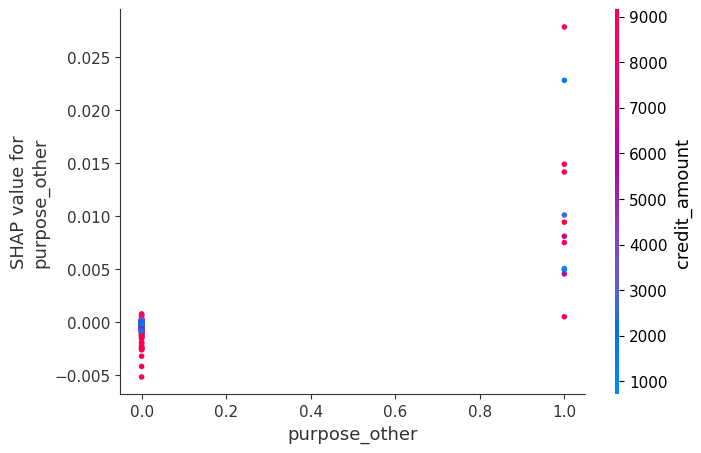

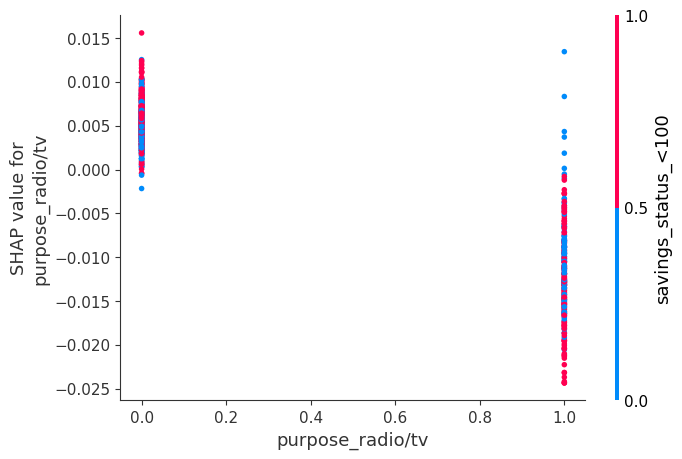

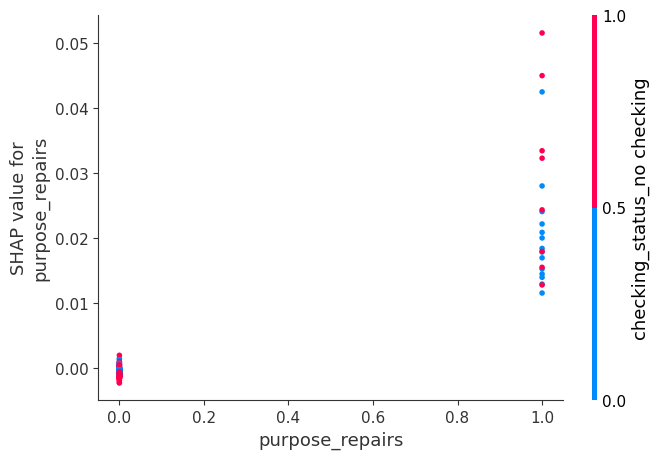

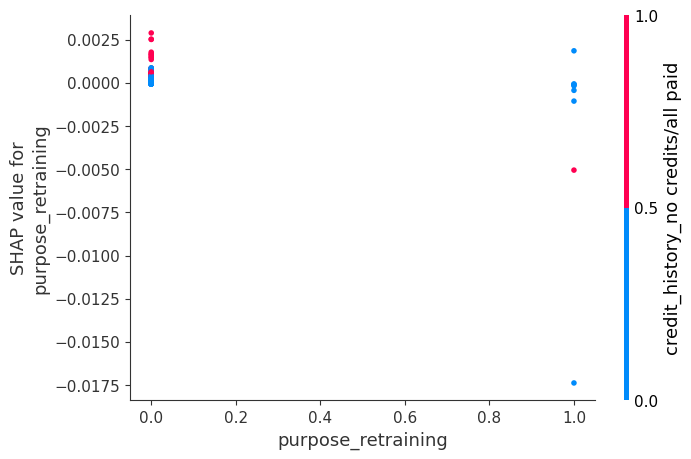

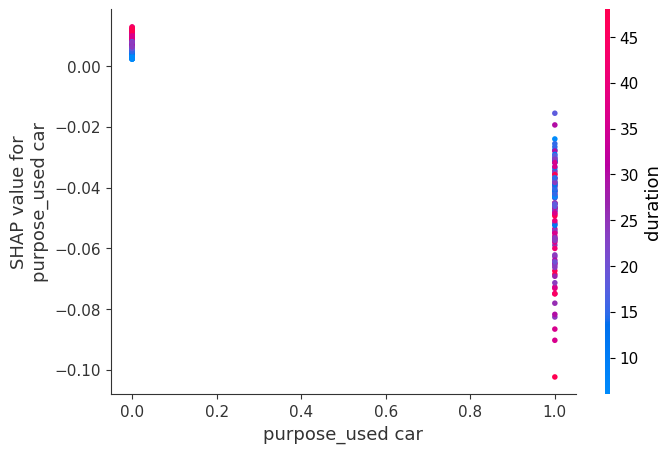

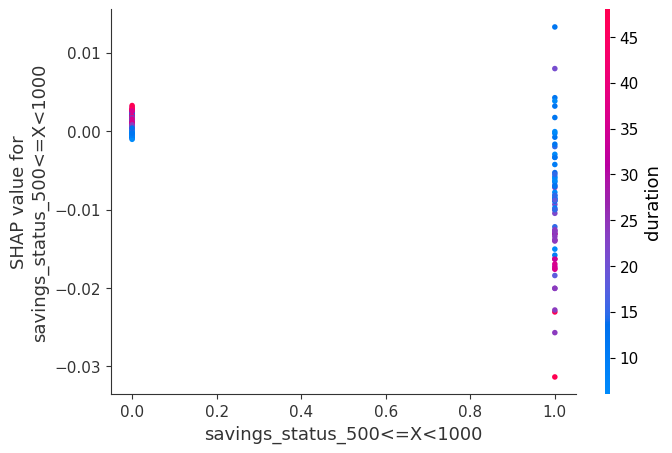

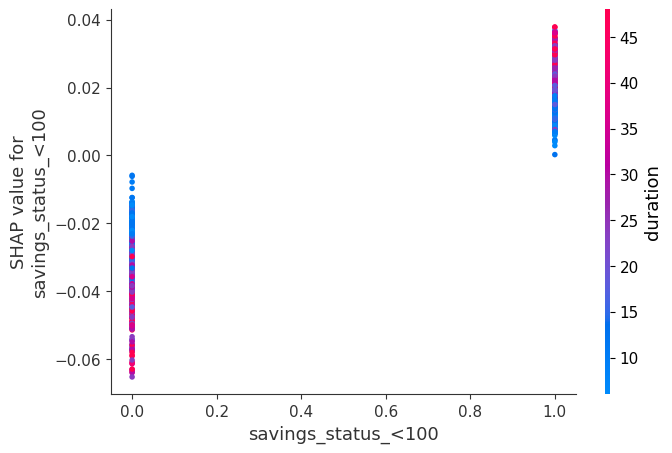

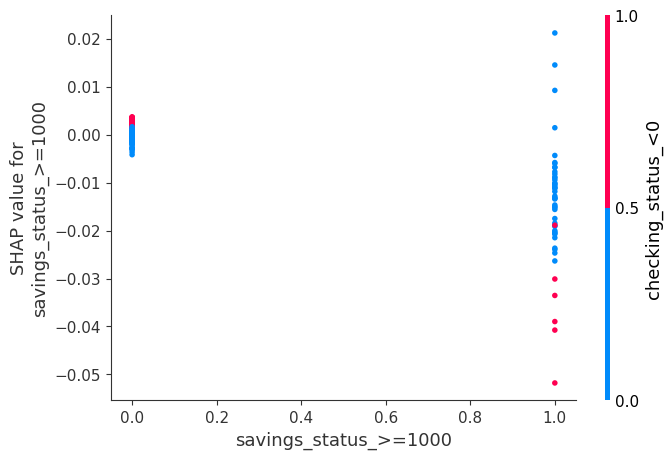

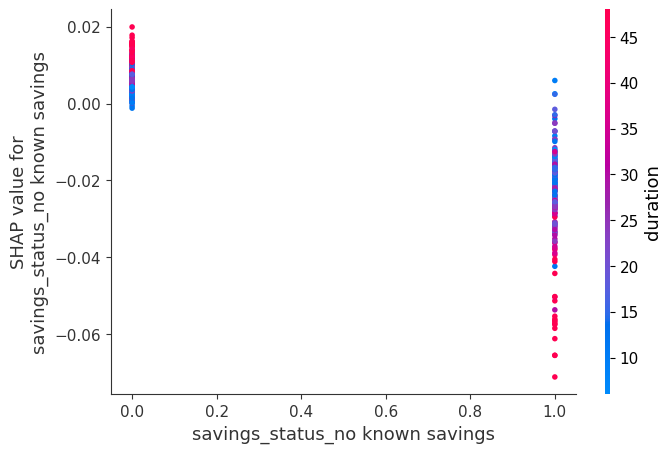

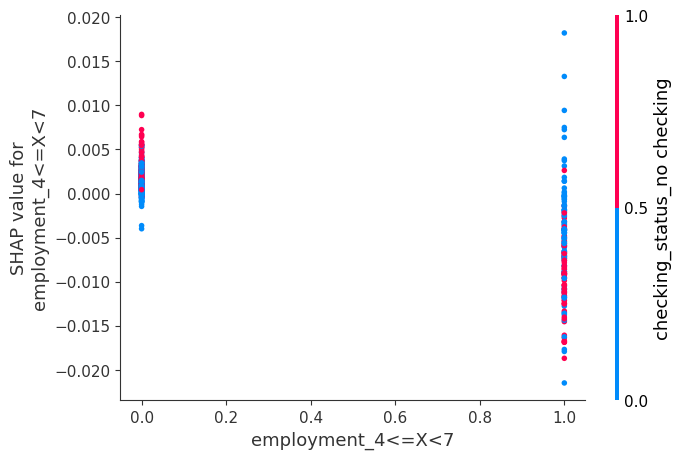

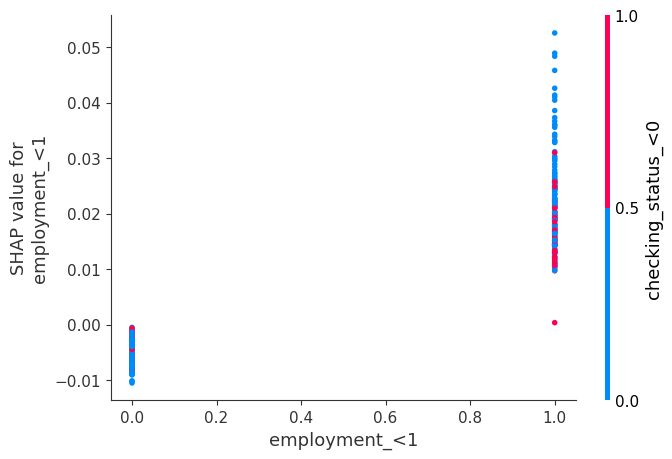

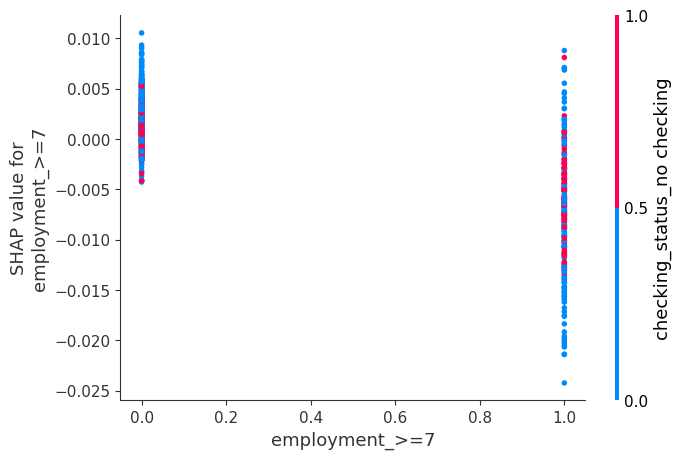

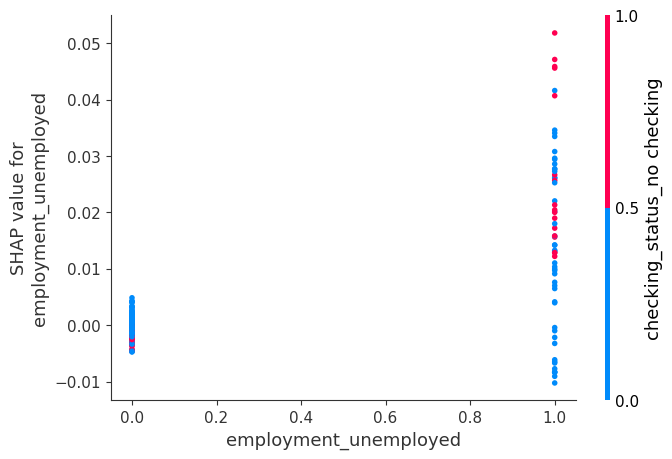

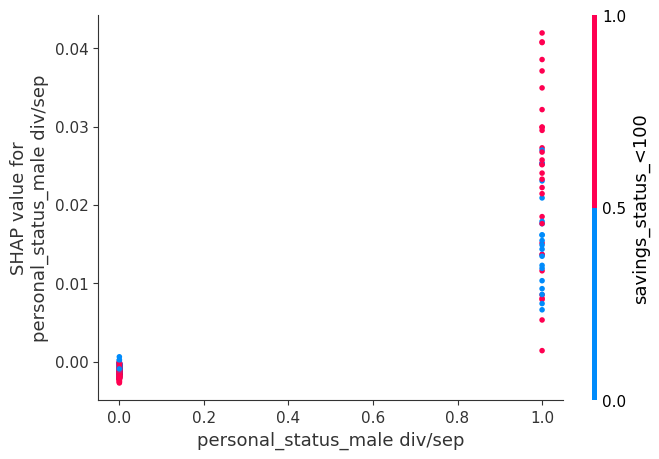

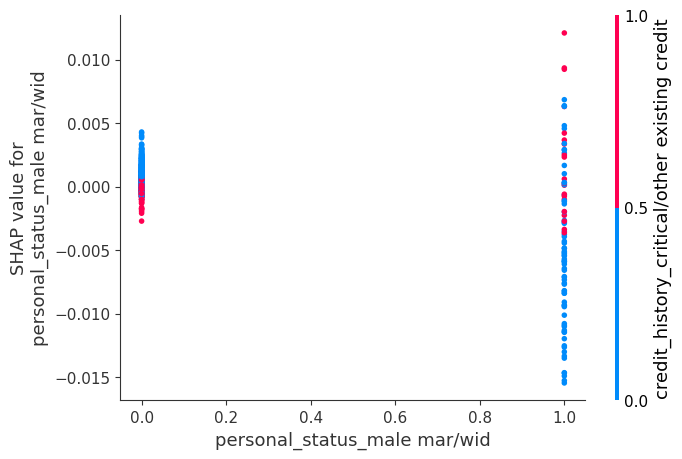

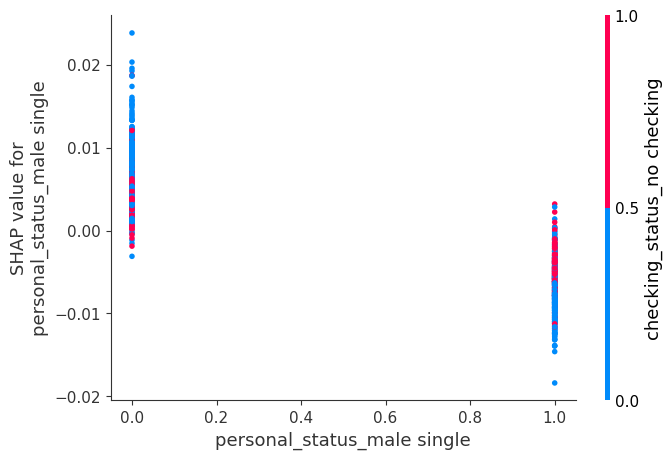

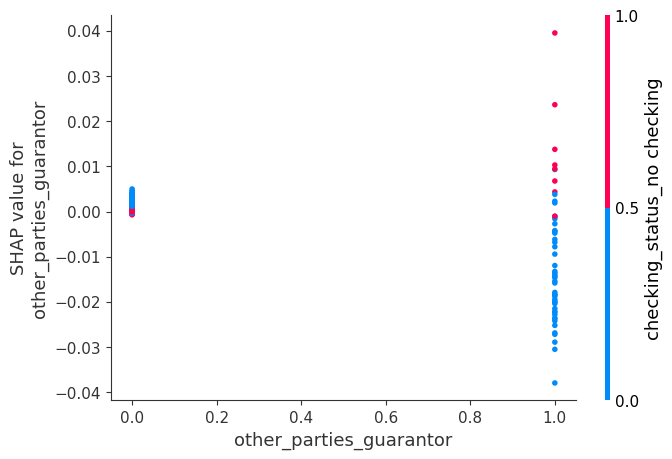

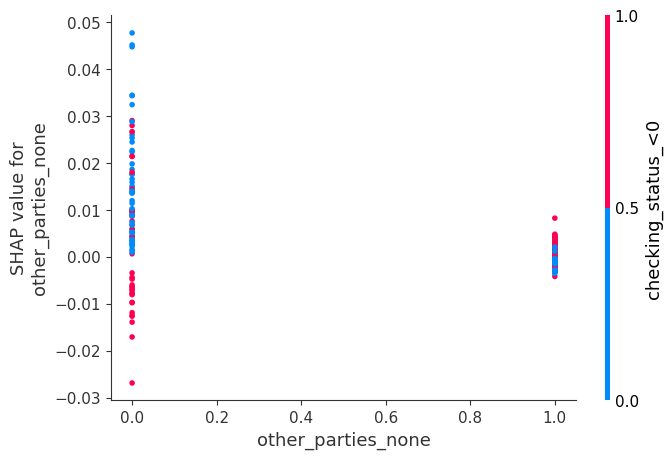

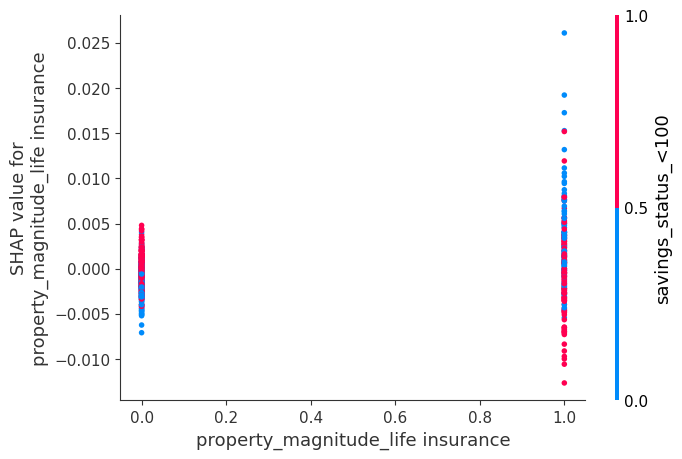

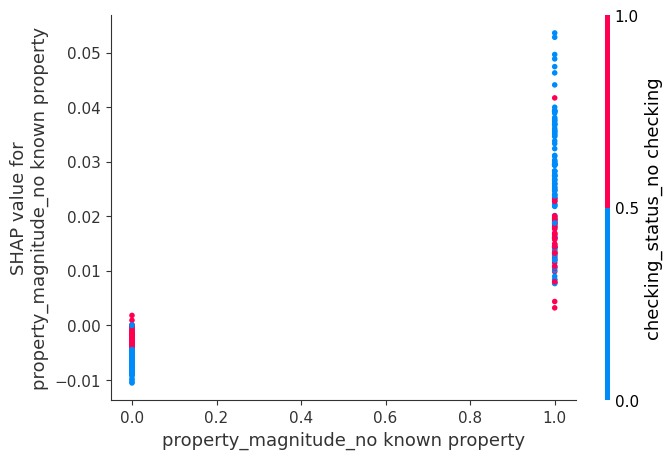

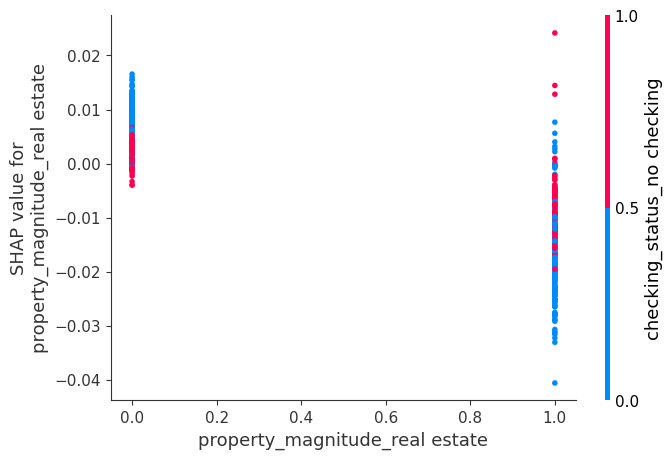

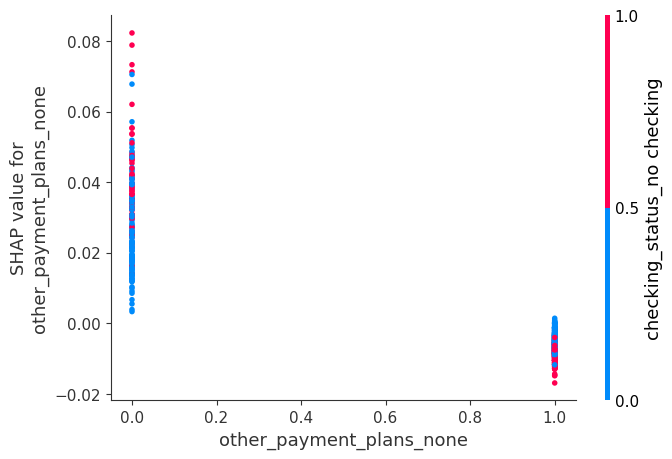

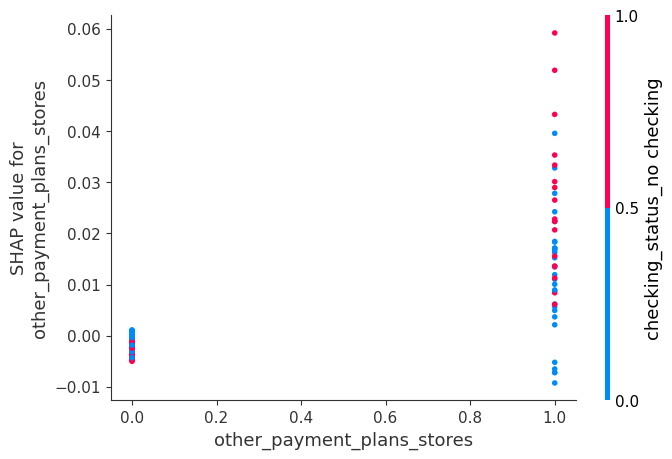

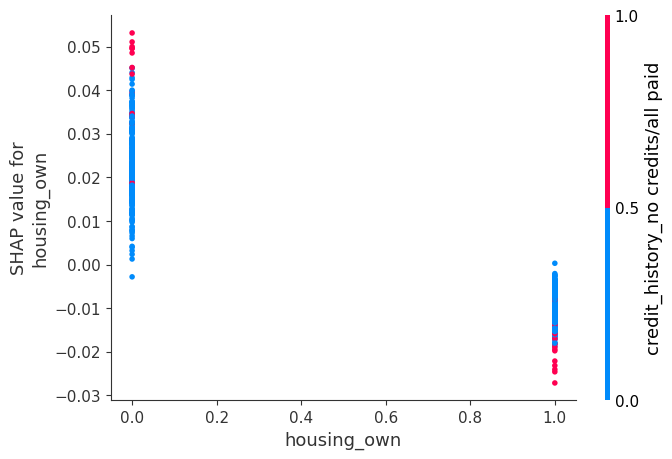

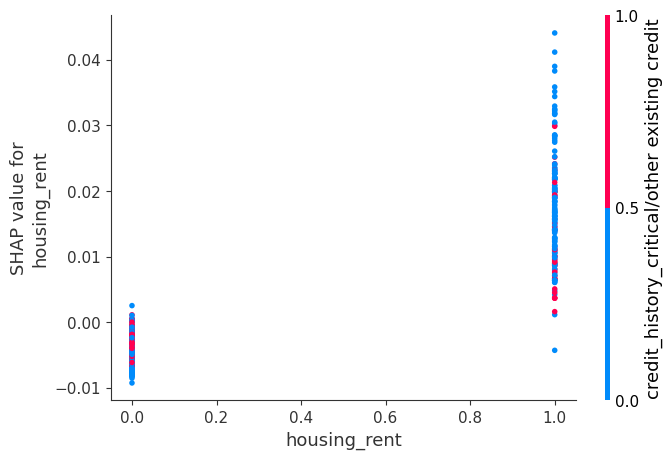

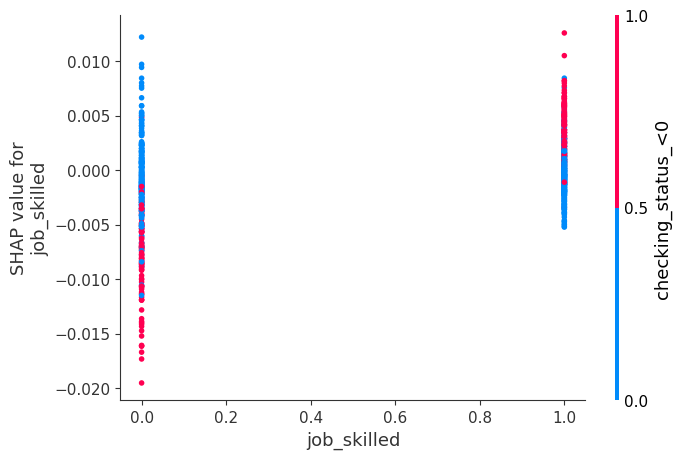

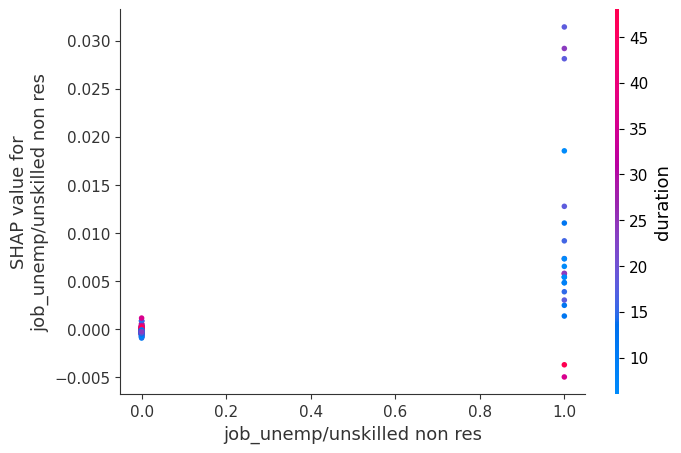

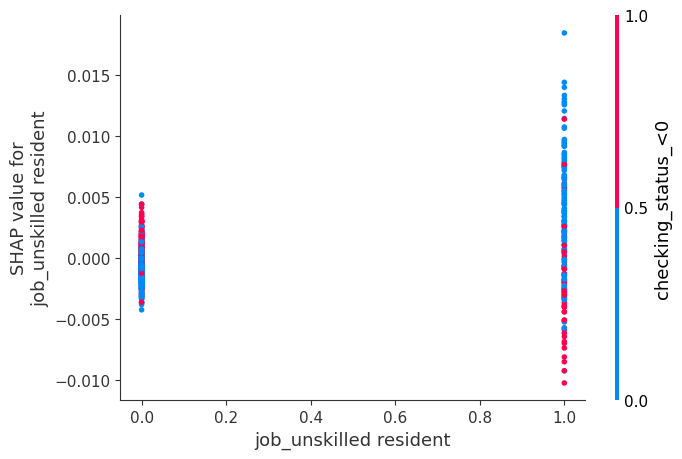

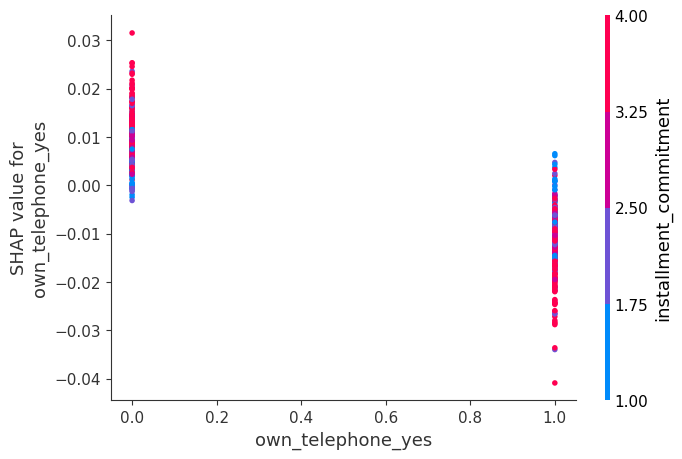

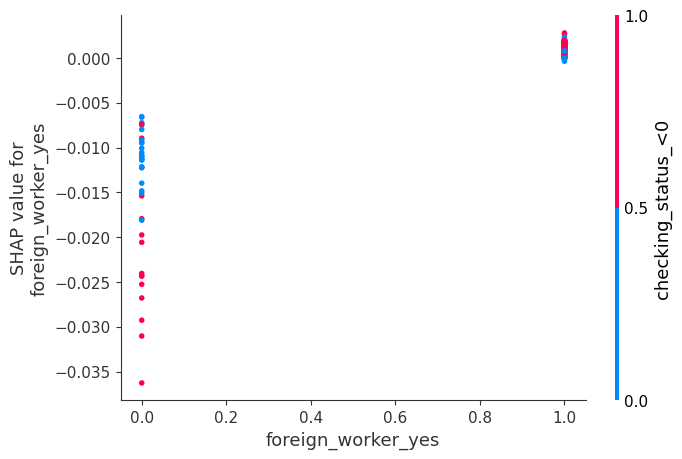

In [11]:
for name in X_prime.columns:
    shap.dependence_plot(name, shap_values[0], X_prime, display_features=X_prime)

In [12]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Select features for which you want to generate PDPs
features = ["age", "duration", "credt_amount"]  # Example: First 3 features

# Generate PDPs
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(clf, X_prime, features, ax=ax)
plt.tight_layout()
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\elif.yozkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\__init__.py)